# 비지도 학습

- 비지도 학습이란 지도학습과 달리 training data로 label이 없는 데이터가 주어지는 학습방법을 말한다.   

### 1.  클러스터링 (K-means)

- 클러스터링이란 명확한 분류 기준(label)이 없는 상황에서도 데이터들을 분석하여 가까운(유사한) 것들끼리 묶어주는 작업이다. 이를 통해 데이터들을 그룹으로 추상화하여 새로운 의미를 발견해 나갈 수 있게 된다.
   
   
- K-means 알고리즘은 k값이 주어져있을 때, 데이터들을 k개의 클러스터로 묶는 알고리즘이다.

In [23]:
import random
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
%matplotlib inline

In [2]:
# 중심점이 5개인 100개의 점 데이터를 무작위로 생성
points, labels = make_blobs(n_samples=100, centers=5, n_features=2, random_state=135)

print(points.shape, points[:10]) #무작위 생성된 점의 좌표 10개 출력
print(labels.shape, labels[:10]) #10개의 점들이 각각 대응하는 중심점(label) 출력

(100, 2) [[ 4.63411914 -6.52590383]
 [-6.52008604  7.16624288]
 [ 2.14142339 -5.21092623]
 [ 1.70054231  8.54077897]
 [-0.33809159  8.76509668]
 [-7.69329744  7.94546313]
 [ 3.89090121 -3.06531839]
 [ 3.22338498 -2.93209009]
 [-6.63962964  5.34777334]
 [ 6.37904965 -6.46617328]]
(100,) [2 1 0 3 3 1 0 0 1 2]


- 위에서 비지도 학습의 정의에 따르면 분류 기준 없이, 즉 label 없이 한다 했는데, 코드에는 label이 등장한다.
- 이 것은 임의로 지정한 k개의 중심점이 새로운 label 역할을 하는 것이다. 그것이 k-means의 아이디어

,X,Y
0,4.634119,-6.525904
1,-6.520086,7.166243
2,2.141423,-5.210926
3,1.700542,8.540779
4,-0.338092,8.765097


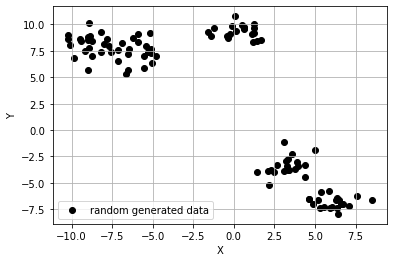

In [3]:
# 축 그리기
fig = plt.figure()
ax = fig.add_subplot(1,1,1)

# 위에서 생성한 점 데이터들을 pandas DataFrame 형태로 변환하기
points_df = pd.DataFrame(points, columns=['X', 'Y'])
display(points_df.head())

# 점 데이터를 X-Y grid에 시각화
ax.scatter(points[:, 0], points[:, 1], c='black', label='random generated data')

# 축 이름 라벨에 달고 점 데이터 그리기
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.legend()
ax.grid()

- 생성한 데이터에 K-means 알고리즘 적용
- 두 점 사이의 거리를 L2 Distance를 이용하여 적용할 것이다.

In [4]:
from sklearn.cluster import KMeans

kmeans_cluster = KMeans(n_clusters=5)

kmeans_cluster.fit(points)

KMeans(n_clusters=5)

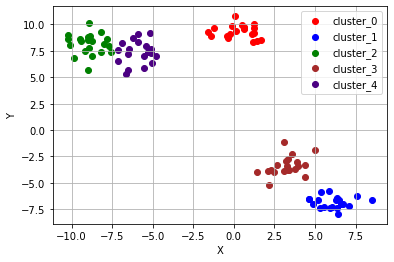

In [5]:
# n번째 클러스터 데이터를 어떤 색으로 도식할 지 결정하는 color dictionary
color_dict = {0:'red', 1:'blue', 2:'green', 3:'brown', 4:'indigo'}

# 점 데이터를 X-Y grid에 시각화
fig = plt.figure()
ax = fig.add_subplot(1,1,1)

# K-means clustering의 결과대로 색깔별로 구분하여 점에 색칠한 후 도식
for cluster in range(5):
    cluster_sub_points = points[kmeans_cluster.labels_==cluster]
    ax.scatter(cluster_sub_points[:, 0], cluster_sub_points[:, 1], c=color_dict[cluster], label='cluster_{}'.format(cluster))

#축 이름을 라벨에 달고, 점 데이터 그리기
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.legend()
ax.grid()

- K-means 가 적합하지 않은 상황
    1. 군집의 갯수를 미리 지정해야 하므로, 이를 알거나 예측하기 어려운 경우
    2. 유클리드 거리가 가까운 데이터끼리 군집이 형성되믄데, 데이터의 분포에 따라 유클리드 거리가 멀면서 밀접하게 연관되어 있는 데이터들의 군집화가 힘들 수 있다.

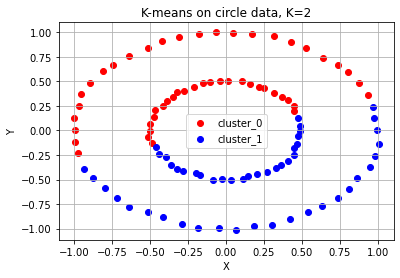

In [7]:
from sklearn.datasets import make_circles

# 원형 분포 데이터 생성
circle_points, circle_labels = make_circles(n_samples=100, factor=0.5, noise=0.01) # 원형 분포를 가지는 점 데이터 100개를 생성합니다.

# 캔버스 생성
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

# 원형 분포에 대해 K-means 수행
circle_kmeans = KMeans(n_clusters=2)
circle_kmeans.fit(circle_points)
color_dict = {0: 'red', 1: 'blue'}
for cluster in range(2):
    cluster_sub_points = circle_points[circle_kmeans.labels_ == cluster]
    ax.scatter(cluster_sub_points[:, 0], cluster_sub_points[:, 1], c=color_dict[cluster], label='cluster_{}'.format(cluster))
ax.set_title('K-means on circle data, K=2')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.legend() 
ax.grid()

### 2. 클러스터링 (DBSCAN)

- 밀도 기반의 군집 알고리즘

- K-means에서 해결하기 어려웠던 문제들을 해결할 수 있다.

- K-means 알고리즘에서 K 값을 미리 지정할 필요가 없다.
    - 클러스터가 최초의 임의의 점 하나로부터 퍼져나감

- DBSCAN 용어
   

    1. epsilon : 클러스터의 반경
    2. minPts : 클러스터를 이루는 개체의 최소값
    3. core point : 반경 epsilon 내에 minPts 개 이상의 점이 존재하는 중심점
    4. border point : 군집의 중심이 되지는 못하지만, 군집에 속하는 점
    5. noise point : 군집에 포함되지 못하는 점
   

- DBSCAN 에서는 epsilon과 minPts를 미리 지정해주어야 한다.

- DBSCAN 알고리즘 순서
   

    1. 임의의 점 p를 설정, p를 포함하여 주어진 클러스터의 반경(epsilon) 안에 포함되어 있는 점들의 갯수를 센다.
    2. 해당 원에 minPts 개 이상의 점이 포함되어 있으면, 해당 점 p를 core points로 간주하고 하나의 클러스터로 묶는다.
    3. 해당 원에 minPts 개 미만의 점이 포함되어 있으면 일단 pass 한다.
    4. 모든 점에 대해 1~3 반복. 만약 새로운 점 q가 core point가 되고 기존의 p를 core point로 하는 클러스터에 속한다면, 두 개의 클러스터를 하나의 클러스터로 묶는다.
    5. 클러스터에 속하지 못한 점은 noise point로 간주.

# of cluster : 2
DBSCAN Y-hat : [0 0 1 0 1 1 1 0 1 0 0 1 0 0 0 0 0 0 1 1 0 0 0 0 1 1 1 1 0 1 0 1 1 0 0 1 1
 0 1 0 1 0 1 1 0 0 0 1 1 0 1 1 1 0 0 0 1 1 1 1 0 1 0 1 0 1 1 1 1 1 0 0 1 1
 1 0 0 1 1 1 0 1 0 0 0 0 0 1 1 0 1 0 1 1 0 0 0 0 0 1]


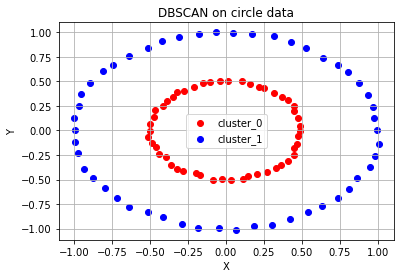

In [8]:
from sklearn.cluster import DBSCAN

fig = plt.figure()
ax = fig.add_subplot(1,1,1)
color_dict = {0:'red', 1:'blue', 2:'green', 3:'brown', 4:'purple'}

#원형 분포 데이터 plot
epsilon = 0.2
minPts = 3
circle_dbscan = DBSCAN(eps=epsilon, min_samples=minPts)
circle_dbscan.fit(circle_points)
n_cluster = max(circle_dbscan.labels_) + 1  #위 과정의 반복으로 클러스터의 수 도출

print(f'# of cluster : {n_cluster}')
print(f'DBSCAN Y-hat : {circle_dbscan.labels_}')

# DBSCAN 알고리즘 수행결과로 도출된 클러스터의 수를 기반으로 색칠한 후 도식
for cluster in range(n_cluster):
    cluster_sub_points = circle_points[circle_dbscan.labels_ == cluster]
    ax.scatter(cluster_sub_points[:, 0], cluster_sub_points[:, 1], c=color_dict[cluster], label='cluster_{}'.format(cluster))

ax.set_title('DBSCAN on circle data')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.legend()
ax.grid()

### 3. 차원축소 (PCA)

- 차원 축소는 수많은 정보 속에서 우리에게 더 중요한 요소가 무엇인지 알게 해주는 방법이다. 특히 비지도학습에서는 데이터를 나타내는 여러 특징들 중에서 어떤 특징이 가장 그 데이터를 잘 표현하는지 알게 해주는 특징 추출의 용도로 사용된다.
   
   
   
- PCA 는 Principle Compenent Analysis로, 데이터 분포의 주성분을 찾아주는 방법이다. 여기서 주성분은 데이터의 분산이 가장 큰 방향 벡터를 의미한다.
   
   
   
- PCA 는 데이터들의 분산을 최대로 보존하면서 서로 직교하는 기저(basis)들을 찾아 고차원 공간을 자차원 공간으로 projection 한다.
   
   
   
- PCA 는 기존 feature 중 중요한 것을 선택하는 방식이 아닌 기존의 feature를 선형 결합하는 방식으로 사용한다.
   
   
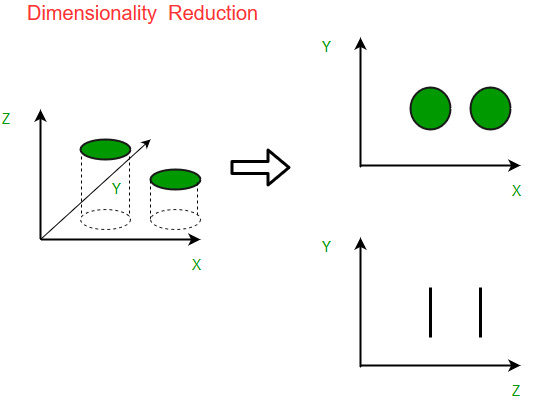

In [9]:
# 차원 축소 예제 : 유방암 데이터셋
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

# 데이터 로드
cancer = load_breast_cancer()

#y=0(Malignant:악성 종양), y=1(Benign:양성 종양)
cancer_X = cancer.data
cancer_y = cancer['target']
train_X, test_X, train_y, test_y = train_test_split(cancer_X, cancer_y, test_size=0.1, random_state=10)
print('전체 검사자 수 : {}'.format(len(cancer_X)))
print('Train dataset에 사용되는 검사자 수 : {}'.format(len(train_X)))
print('Test dataset에 사용되는 검사자 수 : {}'.format(len(test_X)))

전체 검사자 수 : 569
Train dataset에 사용되는 검사자 수 : 512
Test dataset에 사용되는 검사자 수 : 57


In [10]:
cancer_df = pd.DataFrame(cancer_X, columns=cancer['feature_names'])
cancer_df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


- 데이터의 수는 len(cancer_X) : 569 rows
- feature의 수 : 30 columns

#### PCA 알고리즘 적용

In [12]:
# 유방암 데이터셋에 PCA 알고리즘 적용
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn import svm
from sklearn.metrics import accuracy_score
from collections import Counter

color_dict = {0:'red', 1:'blue', 2:'red', 3:'blue'}
target_dict = {0:'malegnant_train', 1:'benign_train', 2:'malignant_test', 3:'benign_test'}

In [13]:
# Train data에 PCA 알고리즘 적용
train_X_norm = StandardScaler().fit_transform(train_X)  #불러온 데이터에 대한 정규화 : 각 column의 range가 전부 다르므로 정규화 진행
train_df = pd.DataFrame(train_X_norm, columns=cancer['feature_names'])
pca = PCA(n_components=2) #주성분의 수를 2개, 즉 basis가 되는 방향벡터 2개로 하는 PCA
pc = pca.fit_transform(train_df)

In [15]:
# Test data에 PCA 알고리즘 적용
test_X_norm = StandardScaler().fit_transform(test_X)  #normalization
test_df = pd.DataFrame(test_X_norm, columns=cancer['feature_names'])
pca_test = PCA(n_components=2)
pc_test = pca_test.fit_transform(test_df)

#### SVM 훈련 : 주성분을 기반으로 양성/악성 구분해주는 결정 경계선 훈련

In [16]:
#훈련한 classifier의 decision boundary를 그리는 함수
def plot_decision_boundary(X, clf, ax):
    h = .02 #step size in the mesh
    #create a mesh to plot in
    x_min, x_max = X[:, 0].min()-1, X[:, 0].max()+1
    y_min, y_max = X[:, 1].min()-1, X[:, 1].max()+1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    ax.contour(xx, yy, Z, cmap='Blues')
    
#PCA를 적용한 train data의 classifier 훈련 : classifier로 SVM 사용
clf = svm.SVC(kernel='rbf', gamma=0.5, C=0.8)
clf.fit(pc, train_y)

#PCA를 적용하지 않은 데이터의 SVM 훈련
clf_original = svm.SVC(kernel='rbf', gamma=0.5, C=0.8)
clf_original.fit(train_df, train_y)

SVC(C=0.8, gamma=0.5)

PCA 분석을 사용했을 때의 accuracy : 54명 / 57명 => 0.947368
PCA 분석을 사용하지 않았을 때의 accuracy : 43명 / 57명 => 0.754386


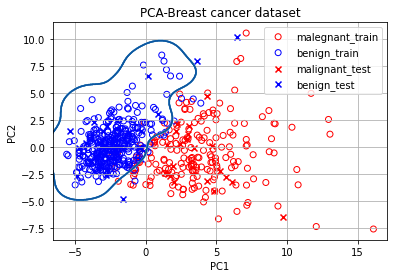

In [18]:
# 캔버스 도식
fig = plt.figure()
ax = fig.add_subplot(1,1,1)

# malignent 와 benign 의 SVM decision boundary 그리기
plot_decision_boundary(pc, clf, ax)

# Train data 도식
for cluster in range(2):
    sub_cancer_points = pc[train_y == cluster]
    ax.scatter(sub_cancer_points[:, 0], sub_cancer_points[:, 1], edgecolor = color_dict[cluster], c='none', label=target_dict[cluster])

# Test data 도식
for cluster in range(2):
    sub_cancer_points = pc_test[test_y == cluster]
    ax.scatter(sub_cancer_points[:, 0], sub_cancer_points[:, 1], marker= 'x', c=color_dict[cluster+2], label=target_dict[cluster+2])
    
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_title('PCA-Breast cancer dataset')
ax.legend()
ax.grid()

# Scoring
pca_test_accuracy_dict = Counter(clf.predict(pc_test) == test_y)
original_test_accuracy_dict = Counter(clf_original.predict(test_df) == test_y)

print('PCA 분석을 사용했을 때의 accuracy : {}명 / {}명 => {:3f}'.format(pca_test_accuracy_dict[True], sum(pca_test_accuracy_dict.values()), clf.score(pc_test, test_y)))
print('PCA 분석을 사용하지 않았을 때의 accuracy : {}명 / {}명 => {:3f}'.format(original_test_accuracy_dict[True], sum(original_test_accuracy_dict.values()), clf_original.score(test_df, test_y)))


- 2개의 주성분만으로 분류한 PCA calssifier의 정확도가 30개의 feature를 모두 사용한 것 보다 훨씬 높은 분류 정확도를 제공한다. 이 이유 중 하나는 30개의 feature 중 종양의 악성/음성과 관련 없는 것이 존재해서 오히려 분류를 방해했기 때문이라고 할 수 있다.
   
   
- 즉, feature의 수가 적더라도, 악성/양성과 관련이 깊은 중요한 feature만을 이용한 분류의 정확도가 훨씬 더 높을 수 있는 것이다.

### 4. 차원축소 (T-SNE)

- T- Stochastic Neighbor Embedding, 시각화에 많이 쓰인다. 우리의 현실 세계는 3차원이며, 우리는 그 이상의 차원을 표현하거나 눈으로 보고 인지하기 어렵다. 이런 이유로 우리는 고차원의 데이터를 1~3차원으로 불러들여와야 비로소 데이터를 시각적으로 이해할 수 있다.
   
   
- 시각화는 PCA도 되는거 아닌가? : 차원축소를 하는 목적에 따라 데이터의 어떤 정보를 보존할 것이냐에 따라 적합한 알고리즘이 따로 있다. PCA는 주로 선형적인 분포를 가지고 있을 때 정보가 잘 보존된다. 하지만 비선형적 데이터에서는 주성분으로 잡을 선형적인 축을 찾기가 어렵다. 즉, 시각화하여 데이터를 이해한다는 목적과는 맞지 않다.


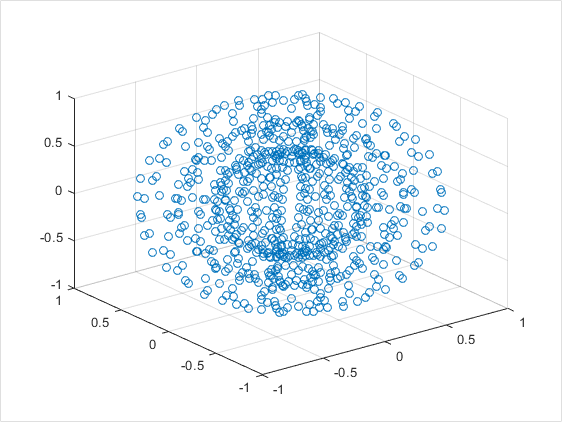

- T-SNE는 기존 차원의 공간에서 가까운 점들은 차원축소된 공간에서도 여전히 가깝게 유지되는 것을 목표로 한다. 이 특징 덕분에 MNIST의 784차원의 숫자 이미지를 2차원으로 시각화하여도 같은 이미지끼리 유사한 거리에 놓이는 것을 확인할 수 있다.

In [19]:
from sklearn.datasets import fetch_openml

#784 pixel로 이루어진 mnist 이미지 데이터 호출
mnist = fetch_openml("mnist_784", version=1)

X = mnist.data/255.0
y = mnist.target
print("X shape : ", X.shape)
print("Y shape : ", y.shape)

X shape :  (70000, 784)
Y shape :  (70000,)


In [20]:
n_image = X.shape[0]
n_image_pixel = X.shape[1]

pixel_columns = [f"pixel{i}" for i in range(1, n_image_pixel+1)] #픽셀정보가 있는 칼럼의 이름을 담은 목록
len(pixel_columns)

784

In [21]:
df = pd.DataFrame(X,columns=pixel_columns)
df['y']=y
df['label'] = df['y'].apply(lambda i:str(i))
X,y = None, None

#### 7만 개의 이미지 데이터 중 1만 개를 랠덤샘플링

In [22]:
#결과가 재생산 가능하도록 랜덤 시드를 지정
np.random.seed(30)

#이미지 데이터의 순서를 랜덤으로 뒤바꾼(permutation) 배열을 담는다
randperm = np.random.permutation(n_image)

#랜덤으로 섞은 이미지 중 10000개를 뽑고 df_subset에 담는다
n_image_sample = 10000
random_idx = randperm[:n_image_sample]
df_subset = df.loc[randperm[:n_image_sample],:].copy()
df_subset.shape

(10000, 786)

<Figure size 432x288 with 0 Axes>

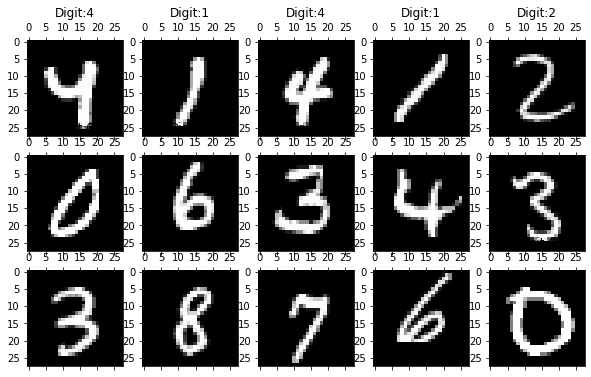

In [24]:
plt.gray()
fig = plt.figure(figsize=(10,6))
n_img_sample = 15
width, height = 28, 28

#15개 샘플 시각화
for i in range(0, n_img_sample):
    row = df_subset.iloc[i]
    ax = fig.add_subplot(3,5,i+1, title=f"Digit:{row['label']}")
    ax.matshow(row[pixel_columns]
               .values.reshape((width,height))
               .astype(float))
    
plt.show()

#### (1) PCA를 이용한 MNIST 차원 축소

In [25]:
print('df_subset의 shape : {}'.format(df_subset.shape))

n_dimension = 2  #축소시킬 목표 차원의 수
pca = PCA(n_components = n_dimension)

pca_result = pca.fit_transform(df_subset[pixel_columns].values) #차원 축소 결과
df_subset['pca_1'] = pca_result[:, 0] #축소한 결과의 첫 번째 차원 값
df_subset['pca_2'] = pca_result[:, 1] #축소한 결과의 두 번째 차원 값

print('pca_result의 shape{}'.format(pca_result.shape))

df_subset의 shape : (10000, 786)
pca_result의 shape(10000, 2)


#### 차원 축소후 보존하는 정보량 확인

In [26]:
print(f"pca-1: {round(pca.explained_variance_ratio_[0],3)*100}%")
print(f"pca-2: {round(pca.explained_variance_ratio_[1],3)*100}%")

pca-1: 9.6%
pca-2: 7.3%


<AxesSubplot:xlabel='pca_1', ylabel='pca_2'>

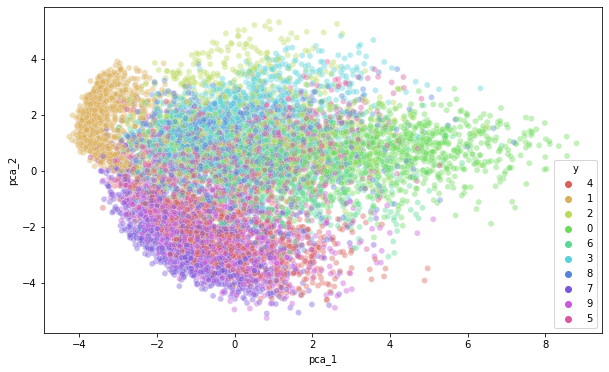

In [32]:
plt.figure(figsize=(10,6))
sns.scatterplot(
    x="pca_1", y="pca_2",
    hue="y",
    palette=sns.color_palette("hls", 10),
    data=df_subset,   # 2개의 PC축만 남은 데이터프레임 df_subset 을 시각화해 보자.
    legend="full",
    alpha=0.4
)

#### (2) T-SNE를 이용한 MNIST 차원축소

In [34]:
from sklearn.manifold import TSNE

print("df_subset의 shape: {}".format(df_subset.shape))

data_subset = df_subset[pixel_columns].values
n_dimension = 2
tsne = TSNE(n_components=n_dimension)
tsne_results = tsne.fit_transform(data_subset)

print("tsne_results의 shape: {}".format(tsne_results.shape))

df_subset의 shape: (10000, 788)
tsne_results의 shape: (10000, 2)


<AxesSubplot:xlabel='tsne-2d-one', ylabel='tsne-2d-two'>

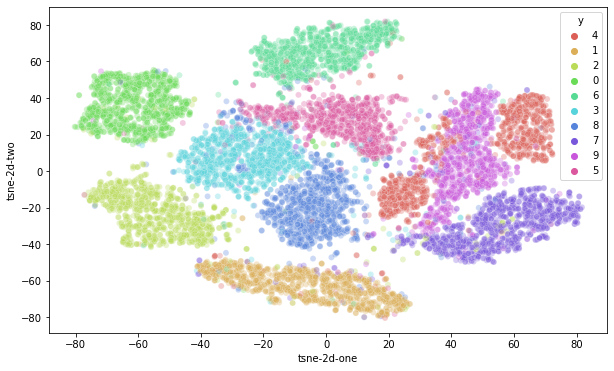

In [35]:
# tsne 결과를 차원별로 추가
df_subset['tsne-2d-one'] = tsne_results[:,0]
df_subset['tsne-2d-two'] = tsne_results[:,1]

# 시각화해 봅니다.
plt.figure(figsize=(10,6))
sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    hue="y",
    palette=sns.color_palette("hls", 10),
    data=df_subset,
    legend="full",
    alpha=0.3
)

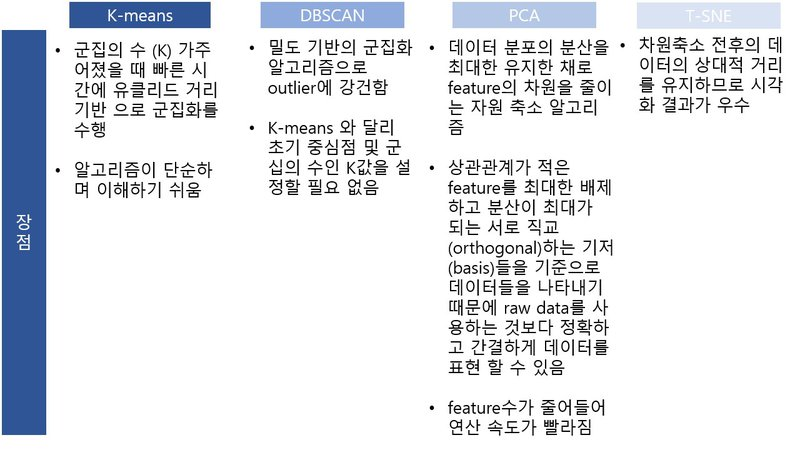